(360, 360) (9, 362, 362)


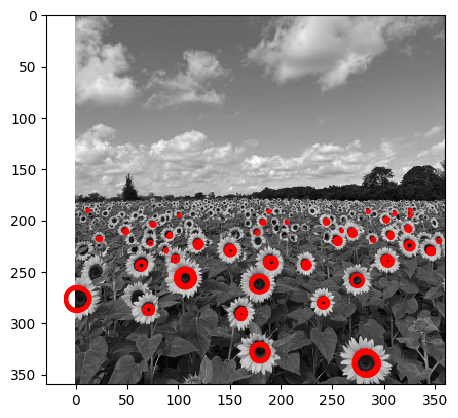

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("the_berry_farms_sunflower_field.jpeg", cv2.IMREAD_REDUCED_COLOR_4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.astype(np.float32) / 255.0 #normalizing

k = 1.414
sigma = 1.0


def LoG(sigma):
    #window size 
    hw = 3*sigma 
    # creating meshgrid
    X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
    # LoG filter
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    return log



def LoG_convolve(img):
    log_images = [] #to store responses
    for sigma in range(1,10):
       
        filter_log = LoG(sigma) #filter generation
        image = cv2.filter2D(img,-1,filter_log) # convolving image

        image = np.pad(image,((1,1),(1,1)),'constant') 
        image = np.square(image) 
        log_images.append(image)
    log_image_np = np.array([i for i in log_images]) # converting to numpy array
    return log_image_np
log_image_np = LoG_convolve(img)


def detect_blob(log_image_np):
    co_ordinates = [] #to store co ordinates
    (h,w) = img.shape #image size
    print(img.shape,log_image_np.shape)
    # finding maximum in  window
    for i in range(1,h):
        for j in range(1,w):
            
            slice_img = log_image_np[:,i-1:i+2,j-1:j+2] 
            result = np.amax(slice_img) #finding maximum
            if result >= 0.1: #threshold
                # finding co-ordinates of maximum; x: row, y: column, z: depth
                z,x,y = np.unravel_index(slice_img.argmax(),slice_img.shape)
                # storing co-ordinates
                co_ordinates.append((i+x-1,j+y-1,k**z*sigma)) # storing co-ordinates: (x,y,radius)
    return co_ordinates
co_ordinates = list(set(detect_blob(log_image_np)))

fig, ax = plt.subplots()
nh,nw = img.shape
count = 0

ax.imshow(img, interpolation='nearest',cmap="gray")
for blob in co_ordinates:
    y,x,r = blob
    c = plt.Circle((x, y), r*1.414, color='red', linewidth=1.5, fill=False)
    ax.add_patch(c)
ax.plot()  
plt.show()